## Aufgabe 3 - Zeitreihendaten analysieren und in Komponenten zerlegen
### a) Zerlegung
Allgemeines Vorgehen bei der Zerlegung:
1. Zeitreihe vorbereiten: Die Daten müssen in einer geeigneten Struktur vorliegen, z. B. in einem Pandas DataFrame, der nach Zeitpunkten geordnet ist.

2. Zerlegungsmodell auswählen: Entweder das additive Modell (wenn die Amplitude der saisonalen Schwankungen konstant ist) oder das multiplikative Modell (wenn die Amplitude der saisonalen Schwankungen proportional zum Trend variiert).

3. Analyse der Komponenten: Nach der Zerlegung werden die Komponenten analysiert:

    - Trend: Gibt an, ob die Werte im Laufe der Zeit insgesamt steigen, fallen oder konstant bleiben.
    - Saisonale Komponente: Zeigt regelmäßige Muster oder Schwankungen, die in festen Intervallen wiederkehren.
    - Restkomponente: Sollte zufälliges Rauschen darstellen, falls alle systematischen Muster entfernt wurden.

Interpretation: Basierend auf den Ergebnissen kann man Aussagen über die langfristigen Trends, saisonalen Effekte und zufälligen Schwankungen machen.



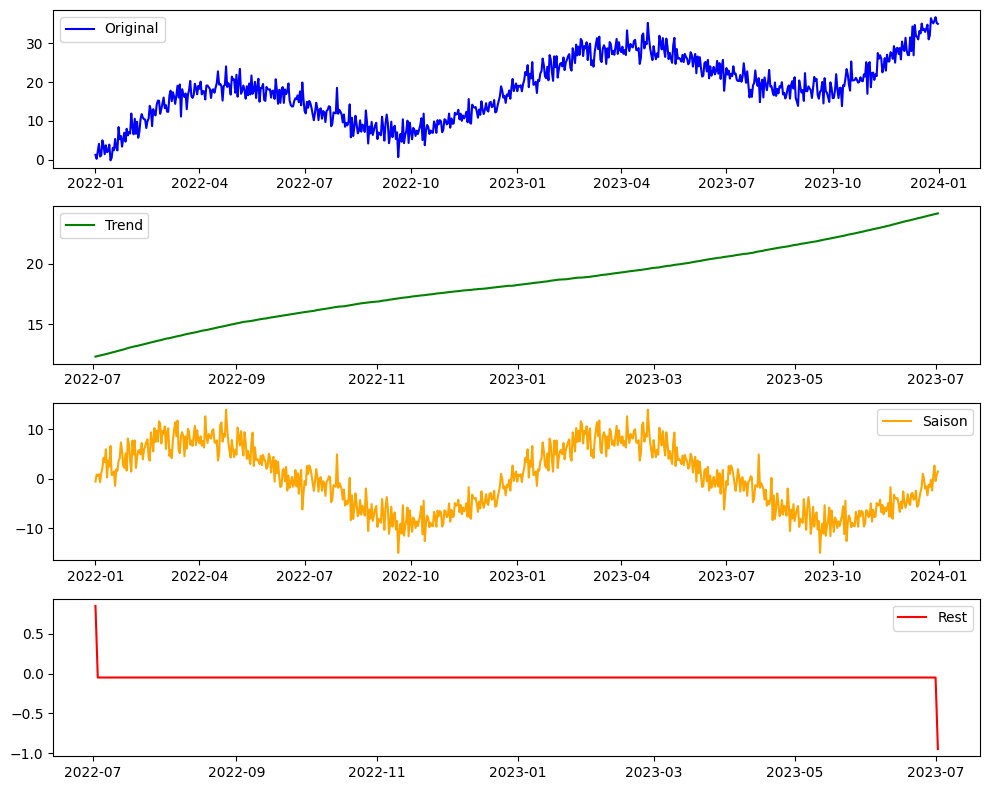

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

dauer = 2 * 365
# Generierung der synthetischen Zeitreihe
def generate_time_series():
    # Zeitreihe
    t = np.arange(1, dauer + 1)

    # Trend-Komponente (T)
    T = 0.05 * t

    # Saisonale Komponente (S) - 1-jähriger Zyklus
    S = 10 * np.sin(2 * np.pi * t / 365)

    # Zyklische Komponente (Z) - 2-jähriger Zyklus
    Z = 5 * np.sin(2 * np.pi * t / dauer)

    # Rauschkomponente (R) - zufälliges Rauschen
    np.random.seed(42)  # Für reproduzierbare Ergebnisse
    R = np.random.normal(0, 2, len(t))

    # Gesamte Zeitreihe (Y)
    Y = T + S + Z + R

    # DataFrame erstellen
    df = pd.DataFrame({
        'Datum': pd.date_range(start='2022-01-01', periods=dauer, freq='D'),
        'Wert': Y
    })
    df.set_index('Datum', inplace=True)  # Datum als Index
    return df

# Zerlegung der Zeitreihe
def decompose_time_series(df):
    # Zerlegung in additive Komponenten (mindestens 2 Zyklen, also 730 Datenpunkte, erforderlich)
    decomposition = seasonal_decompose(df['Wert'], model='additive', period=365)

    # Komponenten extrahieren
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid

    # Plotten der Komponenten
    plt.figure(figsize=(10, 8))

    plt.subplot(411)
    plt.plot(df['Wert'], label='Original', color='blue')
    plt.legend(loc='best')

    plt.subplot(412)
    plt.plot(trend, label='Trend', color='green')
    plt.legend(loc='best')

    plt.subplot(413)
    plt.plot(seasonal, label='Saison', color='orange')
    plt.legend(loc='best')

    plt.subplot(414)
    plt.plot(residual, label='Rest', color='red')
    plt.legend(loc='best')

    plt.tight_layout()
    plt.show()

    # Rückgabe der Komponenten zur weiteren Analyse
    return trend, seasonal, residual

# Hauptprogramm
if __name__ == "__main__":
    # Zeitreihe generieren (2 Jahre)
    df = generate_time_series()

    # Zeitreihe zerlegen und Komponenten analysieren
    trend, seasonal, residual = decompose_time_series(df)

    # Optional: Überprüfung der Restkomponente (weißes Rauschen?)
    #print("\nRest-Komponente (erste 10 Werte):")
    #print(residual.head(10))


### b) Komponenten wiedererkennen
Die Saisonkomponente kann aus verschiedenen Gründen schwer erkennbar sein. Hier sind einige der häufigsten Gründe:

-  Falsche Periodenlänge oder zu wenig Daten für die Zerlegung.
-  Eine schwache oder nicht vorhandene Saisonalität in den Daten.
-  Ein starker Trend oder Rauschen, das die saisonalen Schwankungen überlagert.
-  Eine falsche Modellwahl (additiv vs. multiplikativ).
-  Die Zeitreihe könnte nicht stationär sein, was die Saisonalität verdeckt.
-  Es könnten mehrere Saisonalitäten in der Zeitreihe vorhanden sein, die sich überlagern.

Die Wahl der richtigen Methode zur Zerlegung und die korrekte Parametrisierung (z. B. die Wahl der richtigen Periodenlänge und des Modells) sind entscheidend, um die Saisonkomponente korrekt zu identifizieren. Wenn die saisonalen Schwankungen immer noch nicht sichtbar sind, könnten auch alternative Methoden wie __STL__ oder komplexere Modelle wie __SARIMA__ oder __Prophet__ verwendet werden.

### c) Probleme der Funktion "seasonal_decompose"
Die Funktion seasonal_decompose ist eine einfache und nützliche Methode zur Zerlegung von Zeitreihen, hat jedoch einige Einschränkungen. Zu den häufigsten Problemen gehören die Notwendigkeit von zwei vollständigen Zyklen, der Umgang mit unregelmässigen Zeitreihen, Rauschen und Ausreissern, sowie die Wahl zwischen additiven und multiplikativen Modellen. Für viele dieser Probleme kann die Methode STL (Seasonal and Trend decomposition using Loess) eine robustere Alternative sein, die besser mit unregelmässigen Daten und Ausreissern umgehen kann.

1. STL (Seasonal and Trend decomposition using Loess)
STL ist eine sehr beliebte und flexible Methode zur Zerlegung von Zeitreihen, die viele der Einschränkungen von seasonal_decompose überwindet.

    Vorteile:
    -  Robustheit gegen Ausreisser: STL kann robust gegenüber Ausreissern sein, wenn man die Option robust=True verwendet.
    -  Flexibilität bei der Saisonalität: Im Gegensatz zu seasonal_decompose erfordert STL keine zwei vollständigen Zyklen der Zeitreihe, um die Saisonalität zu erkennen. Es kann auch mit kürzeren Zeitreihen umgehen.
    -  Glättung der Komponenten: STL verwendet eine lokale, gewichtete Regression (LOESS), die eine feinere Kontrolle über die Glättung der Trend- und Saisonkomponenten ermöglicht.
    - Randprobleme: STL handhabt die Glättung am Anfang und Ende der Zeitreihe besser als seasonal_decompose.

2. SARIMA (Seasonal Autoregressive Integrated Moving Average)
SARIMA ist ein erweitertes Modell der ARIMA-Familie, das speziell auf saisonale Daten zugeschnitten ist. Es kombiniert autoregressive (AR), gleitende Durchschnittsprozesse (MA), Integration (I) und saisonale Komponenten.

    Vorteile:
    -  Modellierung von saisonalen und nicht-saisonalen Komponenten: SARIMA kann sowohl saisonale als auch nicht-saisonale Abhängigkeiten modellieren.
    -  Genaue Prognosen: SARIMA ist besonders nützlich, wenn du nicht nur die Zerlegung der Zeitreihe, sondern auch genaue Prognosen erstellen möchtest.
    -  Berücksichtigung von stationären Zeitreihen: SARIMA kann durch Differenzierung (Integration) mit nicht-stationären Zeitreihen umgehen, was ein Vorteil gegenüber seasonal_decompose ist.

3. Prophet (Facebook Prophet)
Facebook Prophet ist ein relativ neues Modell zur Zeitreihenanalyse, das speziell für unregelmäßige, saisonale und stark verrauschte Zeitreihen entwickelt wurde.

    Vorteile:
    -  Robust gegenüber unregelmäßigen Zeitreihen: Prophet kann Zeitreihen mit fehlenden oder unregelmäßigen Datenpunkten verarbeiten, was bei seasonal_decompose ein Problem wäre.
    -  Automatische Handhabung von Feiertagen und saisonalen Ereignissen: Prophet bietet integrierte Unterstützung für das Hinzufügen von Feiertagen und besonderen saisonalen Ereignissen.
    -  Leicht zu konfigurieren: Prophet ist relativ einfach zu verwenden und bietet standardmäßig gute Ergebnisse. Es erfordert weniger manuelle Parameterabstimmung als SARIMA.